In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [125]:
np.set_printoptions(precision=3)

In [220]:
N_coeff = 50

In [221]:
grid = np.cos((2*np.arange(N_coeff) + 1)*np.pi/2/N_coeff)

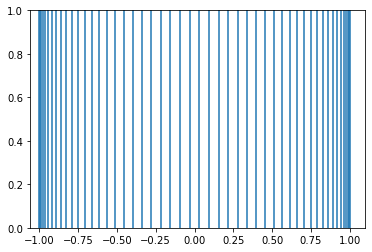

In [222]:
for x in grid:
    plt.axvline(x)

In [223]:
I = np.zeros((N_coeff, N_coeff))

for i in range(N_coeff):
    cat = np.zeros(N_coeff)
    cat[i] = 1
    I[:, i] = np.polynomial.chebyshev.chebval(grid, cat)

In [251]:
D = np.zeros((N_coeff, N_coeff))

for i in range(N_coeff):
    cat = np.zeros(N_coeff)
    cat[i] = 1

    Cheb = np.polynomial.chebyshev.Chebyshev(cat)
    D[:, i] = Cheb.deriv(m = 1)(grid)


D2 = np.zeros((N_coeff, N_coeff))

for i in range(N_coeff):
    cat = np.zeros(N_coeff)
    cat[i] = 1

    Cheb = np.polynomial.chebyshev.Chebyshev(cat)
    D2[:, i] = Cheb.deriv(m = 2)(grid)

In [252]:
def boundify(A):
    for i in range(N_coeff):

        cat = np.zeros(N_coeff)
        cat[i] = 1

        A[0, i] = np.polynomial.chebyshev.chebval(grid[-1], cat)
        A[-1, i] = np.polynomial.chebyshev.chebval(grid[0], cat)


    return A

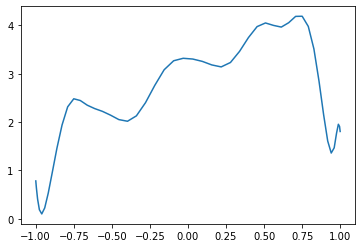

In [369]:
k_cheb = np.random.randn(N_coeff)
k_cheb *= np.exp(-np.arange(N_coeff)/5)
k = np.polynomial.chebyshev.chebval(grid, k_cheb)

if np.min(k) <= 0:
    k_cheb[0] -= np.min(k)
    k_cheb[0] += 0.1

k = np.polynomial.chebyshev.chebval(grid, k_cheb)
k_diff = D @ k_cheb

plt.plot(grid, k)

In [354]:
L = np.diag(k) @ D2 + np.diag(k_diff) @ D

L = boundify(L)

bound = np.zeros(N_coeff)
bound[0] = 1
bound[-1] = 0


cheby_sol = np.linalg.inv(L) @ bound

In [355]:
solution = np.polynomial.chebyshev.chebval(grid, cheby_sol)

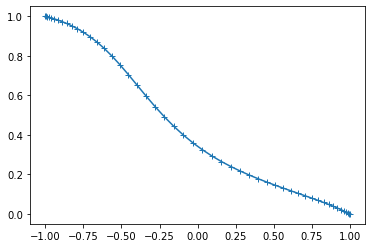

In [356]:
plt.plot(grid, solution, marker = "+")